# Unsupervised learning (nenadgledano učenje)

In [11]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [12]:
from IPython.display import display_html
def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html(index=False)
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

In [13]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [14]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       788 non-null    object 
 1   Age                                           788 non-null    int64  
 2   Gender                                        788 non-null    object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             788 non-null    object 
 5   Household_Income                              788 non-null    object 
 6   Location_Type                                 788 non-null    object 
 7   Basic_Computer_Knowledge_Score                788 non-null    int64  
 8   Internet_Usage_Score                          788 non-null    int64  
 9   Mobile_Literacy_Score                         788 non-null    int64  


In [15]:
df.drop(columns=['User_ID','Overall_Literacy_Score'], inplace=True)

In [16]:
label_mappings = {}

encoding_dfs={}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_dfs[col] = pd.DataFrame(
        list(label_mappings[col].items()),
        columns=[f"{col}_original", f"{col}_encoded"]
    )


In [17]:
showReports(encoding_dfs.values(), encoding_dfs.keys())

Gender 
 
 
 Gender_original 
 Gender_encoded 
 
 
 
 
 Female 
 0 
 
 
 Male 
 1 
 
 
 Other 
 2 
 
 
 Education_Level 
 
 
 Education_Level_original 
 Education_Level_encoded 
 
 
 
 
 High School 
 0 
 
 
 Primary 
 1 
 
 
 Secondary 
 2 
 
 
 Employment_Status 
 
 
 Employment_Status_original 
 Employment_Status_encoded 
 
 
 
 
 Farmer 
 0 
 
 
 Other 
 1 
 
 
 Self-Employed 
 2 
 
 
 Student 
 3 
 
 
 Unemployed 
 4 
 
 
 Household_Income 
 
 
 Household_Income_original 
 Household_Income_encoded 
 
 
 
 
 High 
 0 
 
 
 Low 
 1 
 
 
 Medium 
 2 
 
 
 Location_Type 
 
 
 Location_Type_original 
 Location_Type_encoded 
 
 
 
 
 Rural 
 0 
 
 
 Semi-Rural 
 1 
 
 
 Engagement_Level 
 
 
 Engagement_Level_original 
 Engagement_Level_encoded 
 
 
 
 
 High 
 0 
 
 
 Low 
 1 
 
 
 Medium 
 2 
 
 
 Employment_Impact 
 
 
 Employment_Impact_original 
 Employment_Impact_encoded 
 
 
 
 
 No 
 0 
 
 
 Yes 
 1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    int64  
 1   Gender                                        788 non-null    int32  
 2   Education_Level                               788 non-null    int32  
 3   Employment_Status                             788 non-null    int32  
 4   Household_Income                              788 non-null    int32  
 5   Location_Type                                 788 non-null    int32  
 6   Basic_Computer_Knowledge_Score                788 non-null    int64  
 7   Internet_Usage_Score                          788 non-null    int64  
 8   Mobile_Literacy_Score                         788 non-null    int64  
 9   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    int64  


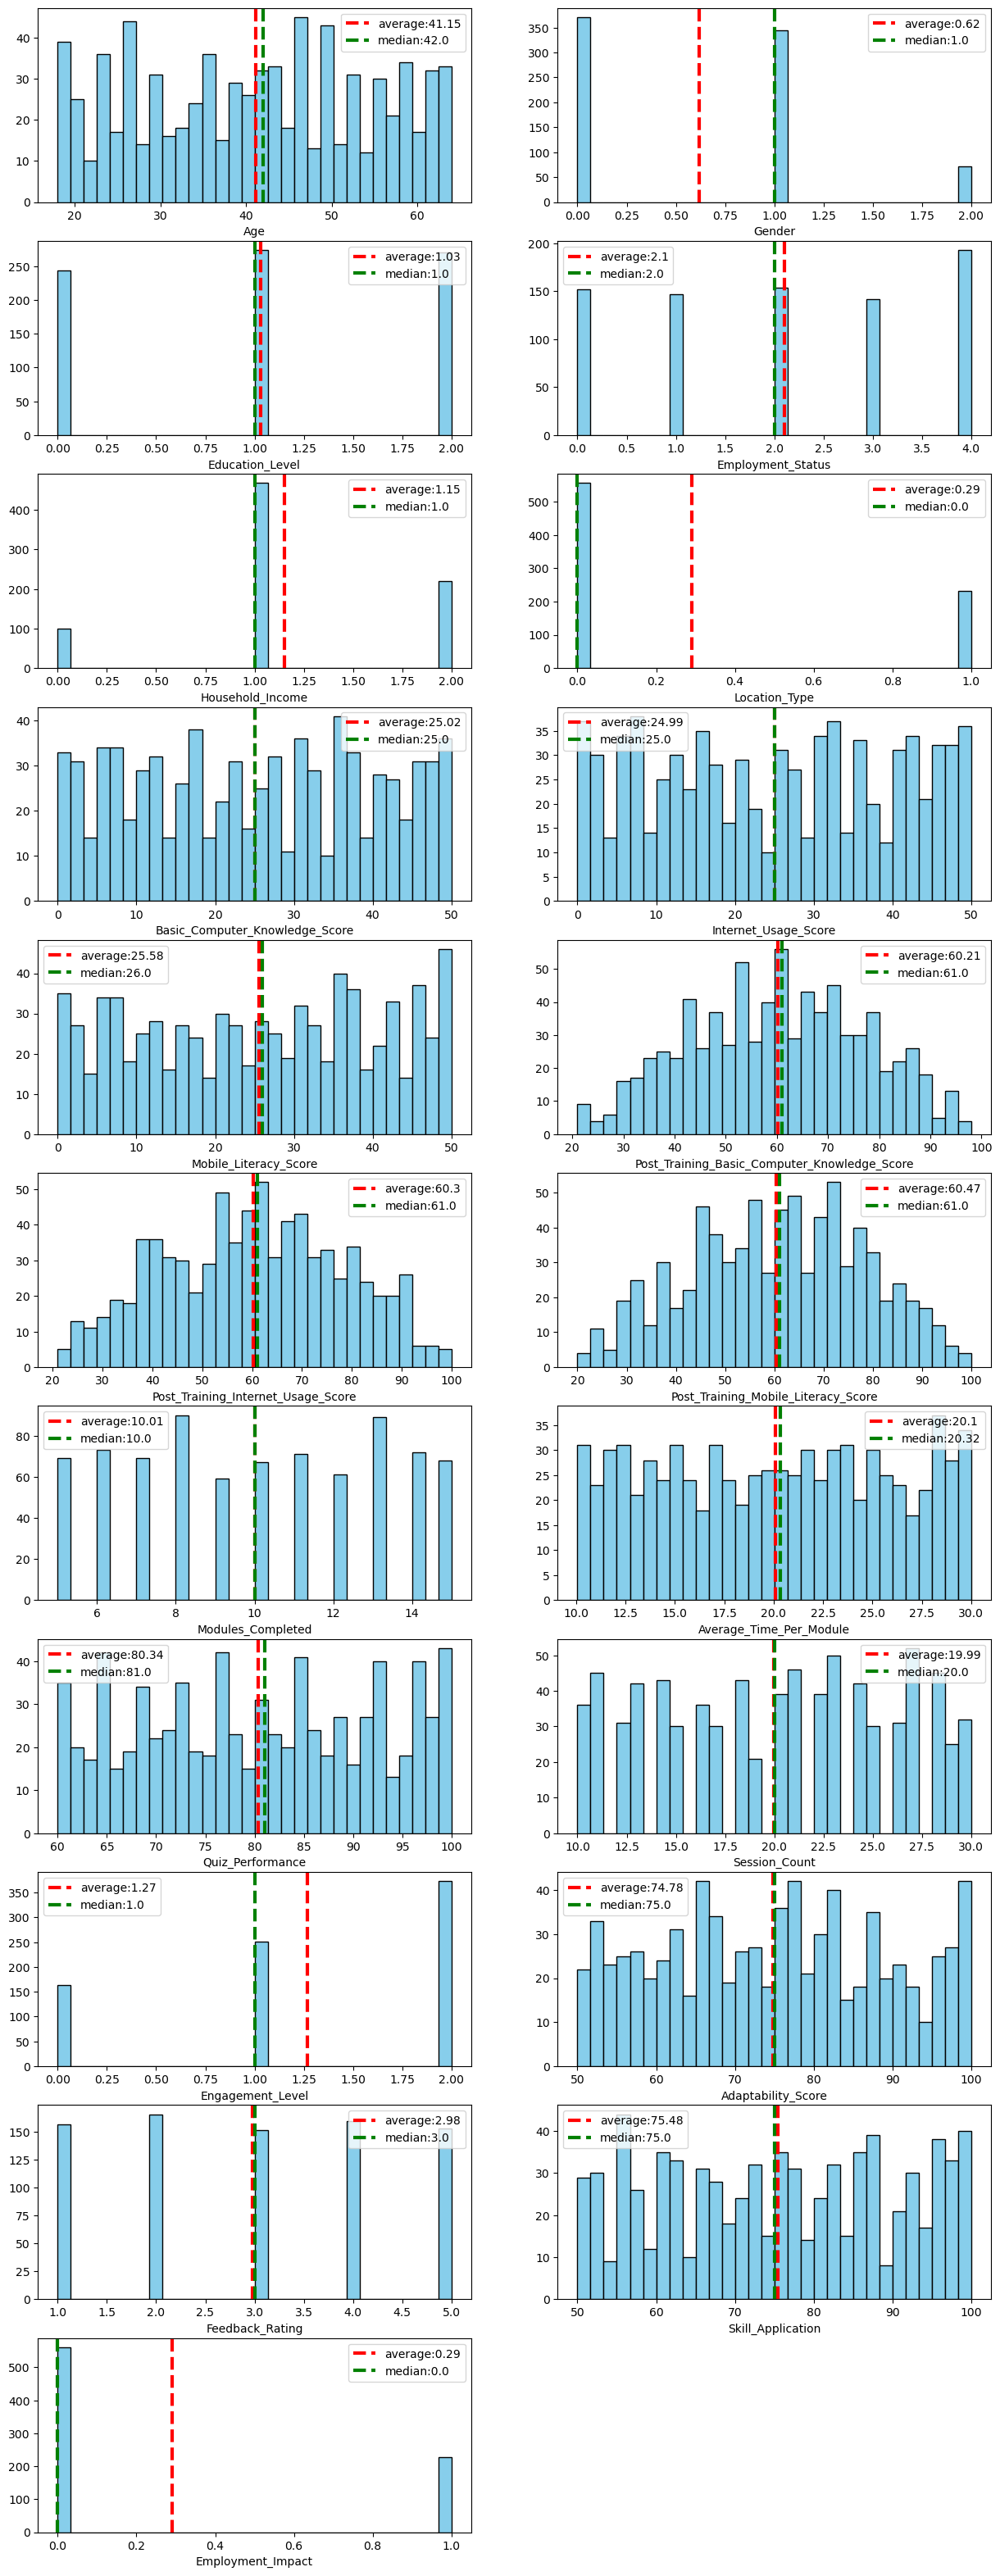

In [19]:
plt.figure(figsize=(15,40))
for ind,col in enumerate(df.columns):
    plt.subplot(11,2,ind+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

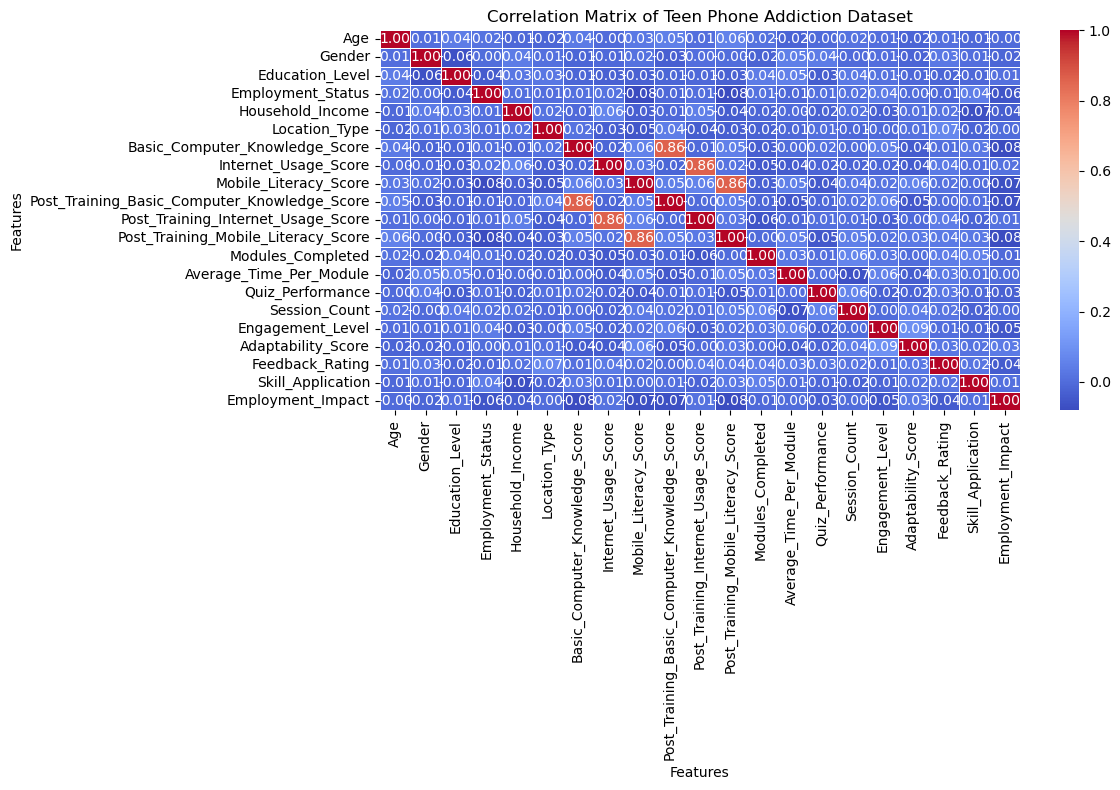

In [20]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| Education_Level | Nivo obrazovanja |
| Employment_status | Status zaposlenja |
| Household_Income  | Prihodi domacinstva |
| Location_Type  | Tip lokacije   |
| Basic_Computer_Knowledge_Score |  Osnovno znanje rada na racunaru |
| Internet_Usage_Score |  Rezultati koriscenja interneta   |
| Mobile_Literacy_Score | Rezultati koriscenja mobilnog  |
| Post_Training_Basic_Computer_Knowledge_Score | Znanje na racunaru posle obuke   |
| Post_Training_Internet_Usage_Score  | Znanje koriscenja interneta nakon obuke  |
| Post_Training_Mobile_Literacy_Score |  Znanje koriscenja mobilnog nakon obuke  |
| Modules_Completed  |  Zavrseni moduli   |
| Average_Time_Per_Module   | Prosecno vreme po modulu |
| Quiz_Performance  | Rezultati kviza   |
| Session_Count | Broj sesija |
| Engagement_Level  |   Nivo angazovanja  |
| Adaptability_Score | Rezultati prilagodljivosti   |
| Feedback_Rating   | Nivo povratne informacije|
| Skill_Application |  Primena vestina   |
| Employment_Impact |  Uticaj zaposljenja  |

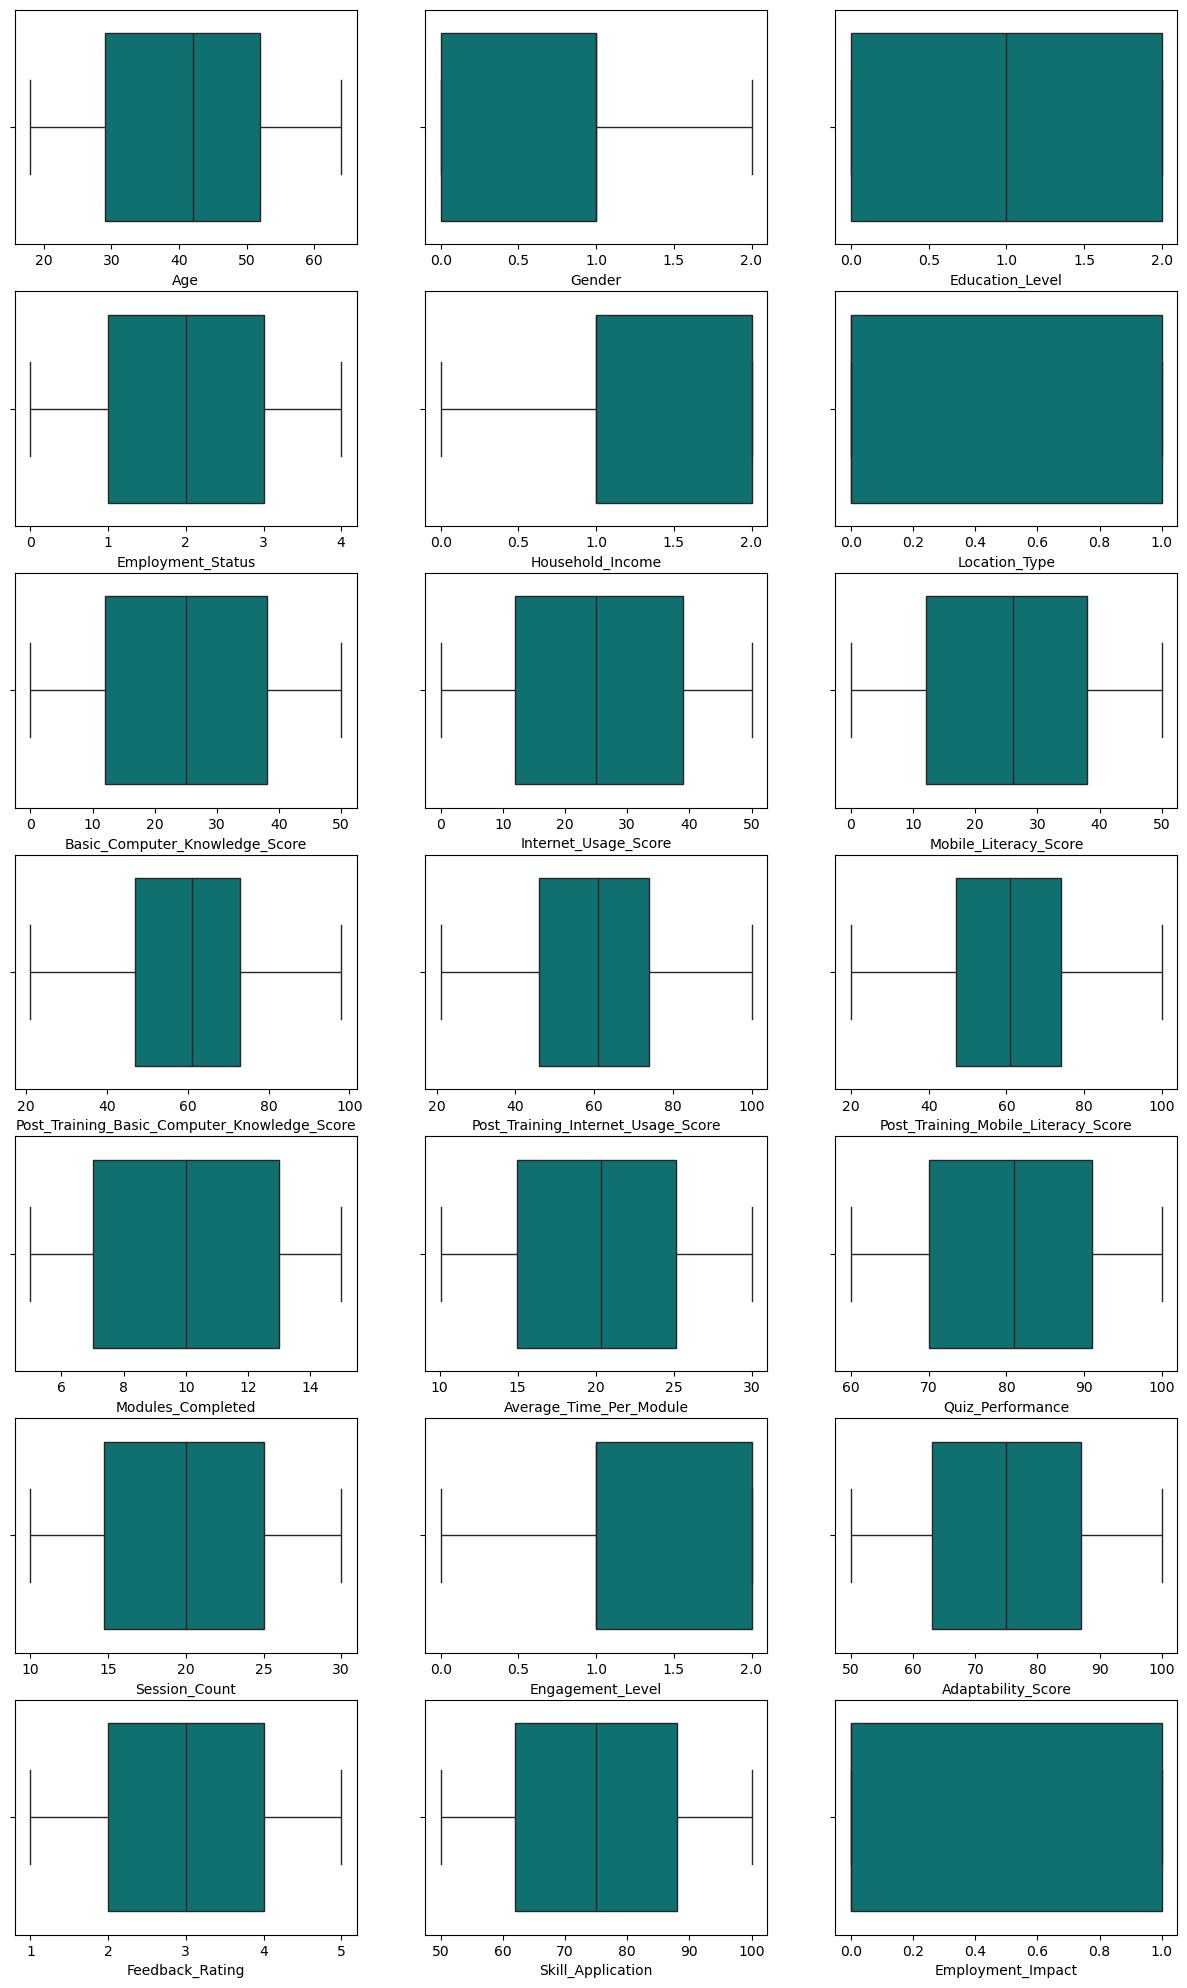

In [21]:
fig = plt.figure(figsize=(15,25))
for i, col in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  seaborn.boxplot(x = df[col], color='teal')
  plt.xlabel(col)

### MinMax or Standard Scaler

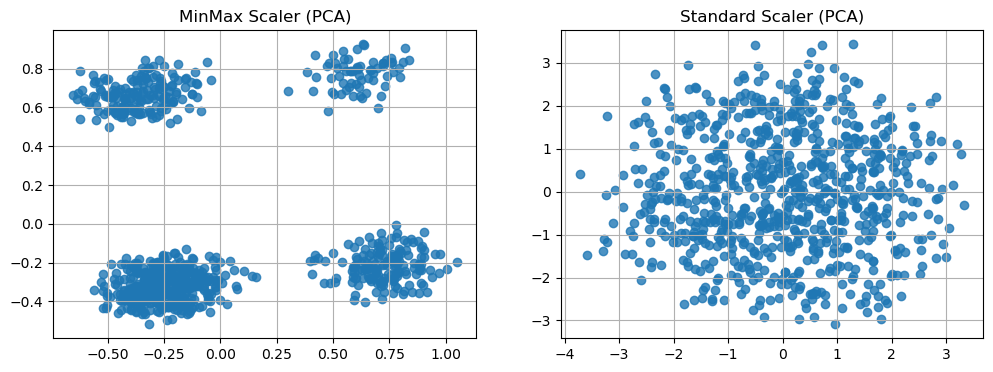

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

df_minmax= minmax_scaler.fit_transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=df.columns)

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_minmax = pca.fit_transform(df_minmax)

df_std= std_scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_std = pca.fit_transform(df_std)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_result_minmax[:, 0], pca_result_minmax[:, 1], alpha=0.8)
plt.title(f"MinMax Scaler (PCA)")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(pca_result_std[:, 0], pca_result_std[:, 1], alpha=0.8)
plt.title(f"Standard Scaler (PCA)")
plt.grid()
plt.show()

df_scaled = df_minmax  # or df_std based on your choice


## K-Means

### PCA

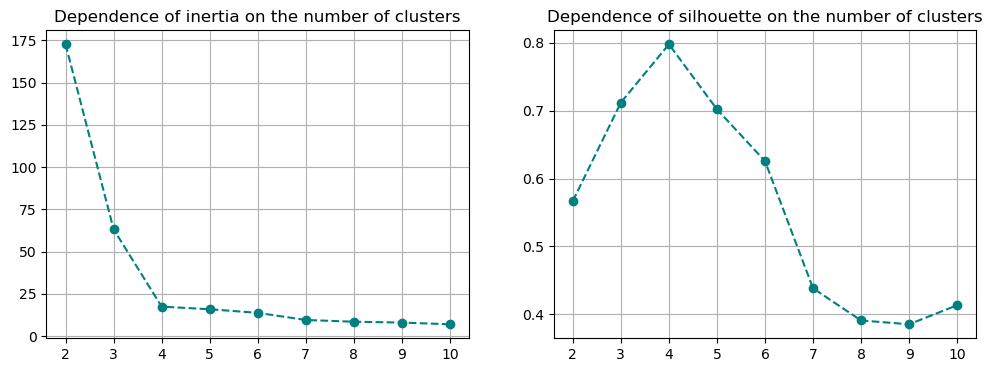

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#scaler = MinMaxScaler()
cols = ['Cluster',"Cluster_Name"]
'''if all(col in df_scaled.columns for col in cols): 
    data=df_scaled.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df_scaled.copy()'''

data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

#scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


Na osnovu grafika inercije i zavisnosti vrednosti siluete možemo zaključiti da je optimalan broj klastera 4. Na grafiku inercije se "lakat" uočava kod 4 klastera, osim toga maksimalna vrednost siluete potvrđuje klasterizacija u 4 klastera.

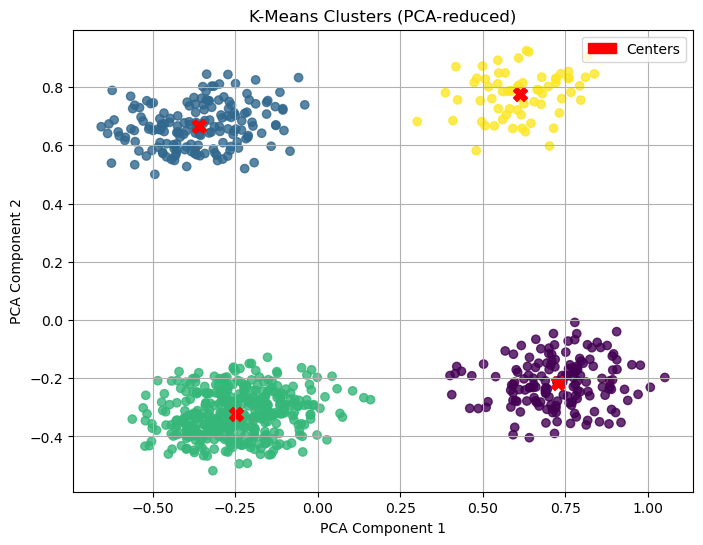

In [24]:
import matplotlib.patches as mpatches

kmeans = KMeans(n_clusters=4, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df_scaled['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Parametri u skupu podataka koje su imale uticaj na klasifikaciju jesu 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score' i njene vrednosti nakon treniranja korisnika 'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score'.

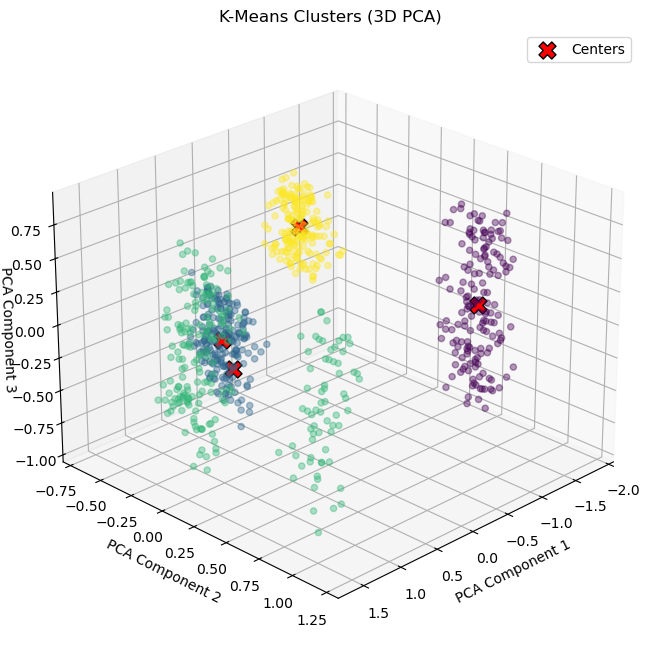

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cols = ['Cluster',"Cluster_Name"]
'''if all(col in df_scaled.columns for col in cols): 
    data=df_scaled.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df_scaled.copy()'''

data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()


#scaled_data = scaler.fit_transform(data)

#data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1, errors='ignore')

pca = PCA(n_components=3) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_3d = pca.fit_transform(data)

kmeans = KMeans(n_clusters=4, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(pca_result_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2],
    c=df_scaled['Cluster'], cmap='viridis', alpha=0.4,zorder=1, depthshade=True
)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],alpha=1,
           c='red', s=150, marker='X', label='Centers',edgecolor='black',zorder=1000,
            depthshade=False,linewidth=1)

ax.set_title("K-Means Clusters (3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3",labelpad=0)
ax.view_init(elev=25, azim=45)
ax.legend()
plt.show()

In [26]:
df_scaled['Digital_Score'] = (
    df_scaled['Internet_Usage_Score'] +
    df_scaled['Mobile_Literacy_Score'] +
    df_scaled['Basic_Computer_Knowledge_Score']
)

cluster_profile = df_scaled.groupby('Cluster')[
    [
        "Cluster",
        'Digital_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
        'Basic_Computer_Knowledge_Score'        
    ]
].mean().round(2).sort_values(by='Digital_Score', ascending=False)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"] 
)

df_scaled.drop(columns=['Digital_Score'], inplace=True)


Cluster Profile 
 
 
 Cluster 
 Digital_Score 
 Internet_Usage_Score 
 Mobile_Literacy_Score 
 Basic_Computer_Knowledge_Score 
 
 
 
 
 1.0 
 1.55 
 0.50 
 0.53 
 0.51 
 
 
 2.0 
 1.51 
 0.48 
 0.50 
 0.53 
 
 
 0.0 
 1.47 
 0.51 
 0.49 
 0.46 
 
 
 3.0 
 1.41 
 0.50 
 0.45 
 0.46

Davanje imena klasterima radi lakše analize

In [27]:
cluster_names = {
    3: "Basic",
    0: "Intermediate",
    2: "Advanced",
    1: "Expert",
}
df_scaled['Cluster_Name'] = df_scaled['Cluster'].map(cluster_names)

mapping_df = pd.DataFrame(
    list(cluster_names.items()),
    columns=["Cluster Number", "Cluster Name"]
)

showReports(
    dfs=[mapping_df],
    titles=["Cluster Mapping"]
)

Cluster Mapping 
 
 
 Cluster Number 
 Cluster Name 
 
 
 
 
 3 
 Basic 
 
 
 0 
 Intermediate 
 
 
 2 
 Advanced 
 
 
 1 
 Expert

In [28]:
df_scaled.columns

Index(['Age', 'Gender', 'Education_Level', 'Employment_Status',
       'Household_Income', 'Location_Type', 'Basic_Computer_Knowledge_Score',
       'Internet_Usage_Score', 'Mobile_Literacy_Score',
       'Post_Training_Basic_Computer_Knowledge_Score',
       'Post_Training_Internet_Usage_Score',
       'Post_Training_Mobile_Literacy_Score', 'Modules_Completed',
       'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
       'Engagement_Level', 'Adaptability_Score', 'Feedback_Rating',
       'Skill_Application', 'Employment_Impact', 'Cluster', 'Cluster_Name'],
      dtype='object')

In [125]:
demographic=['Age','Gender','Education_Level','Employment_Status','Household_Income','Location_Type']
academic=['Modules_Completed','Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
       'Engagement_Level', 'Adaptability_Score', 'Feedback_Rating','Skill_Application', 'Employment_Impact']

In [203]:
feature_pairs=[('Basic_Computer_Knowledge_Score','Post_Training_Basic_Computer_Knowledge_Score'),
               ('Mobile_Literacy_Score','Post_Training_Mobile_Literacy_Score'),
               ('Internet_Usage_Score','Post_Training_Internet_Usage_Score'),
               ('Quiz_Performance','Skill_Application')]

In [ ]:
import itertools
import matplotlib.pyplot as plt


clusters = df_scaled['Cluster'].unique()

for subset in feature_pairs:
    feature1, feature2 = subset

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)

    # Plot each cluster separately
    for cluster in clusters:
        cluster_data = df_scaled[df_scaled['Cluster'] == cluster]
        ax.scatter(
            cluster_data[feature1],
            cluster_data[feature2],
            label=f"Cluster {cluster}",
            alpha=0.6,
            s=30
        )

    # Labels and title
    ax.set_title(f"{feature1}, {feature2}", fontsize=10)
    ax.set_xlabel(feature1, fontsize=9)
    ax.set_ylabel(feature2, fontsize=9)

    # Add legend
    ax.legend(loc="best")

    # Save each figure separately
    filename = f"scatter_{i}_{feature1}_{feature2}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.close(fig)  # close after saving to free memory

In [199]:
import itertools
import matplotlib.pyplot as plt

# Combine features
features_combined = demographic + academic

# Generate all subsets of 3 features
subsets = list(itertools.combinations(features_combined, 3))
print(len(subsets))

# Get unique clusters
clusters = df_scaled['Cluster'].unique()

for i, subset in enumerate(subsets, 1):
    feature1, feature2, feature3 = subset

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each cluster separately
    for cluster in clusters:
        cluster_data = df_scaled[df_scaled['Cluster'] == cluster]
        ax.scatter(
            cluster_data[feature1],
            cluster_data[feature2],
            cluster_data[feature3],
            label=f"Cluster {cluster}",
            alpha=0.6,
            s=30
        )

    # Labels and title
    ax.set_title(f"{feature1}, {feature2}, {feature3}", fontsize=10)
    ax.set_xlabel(feature1, fontsize=9)
    ax.set_ylabel(feature2, fontsize=9)
    ax.set_zlabel(feature3, fontsize=9, labelpad=8)

    # Add legend
    ax.legend(loc="best")

    # Save each figure separately
    filename = f"scatter_{i}_{feature1}_{feature2}_{feature3}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.close(fig)  # close after saving to free memory

455


### TSNE

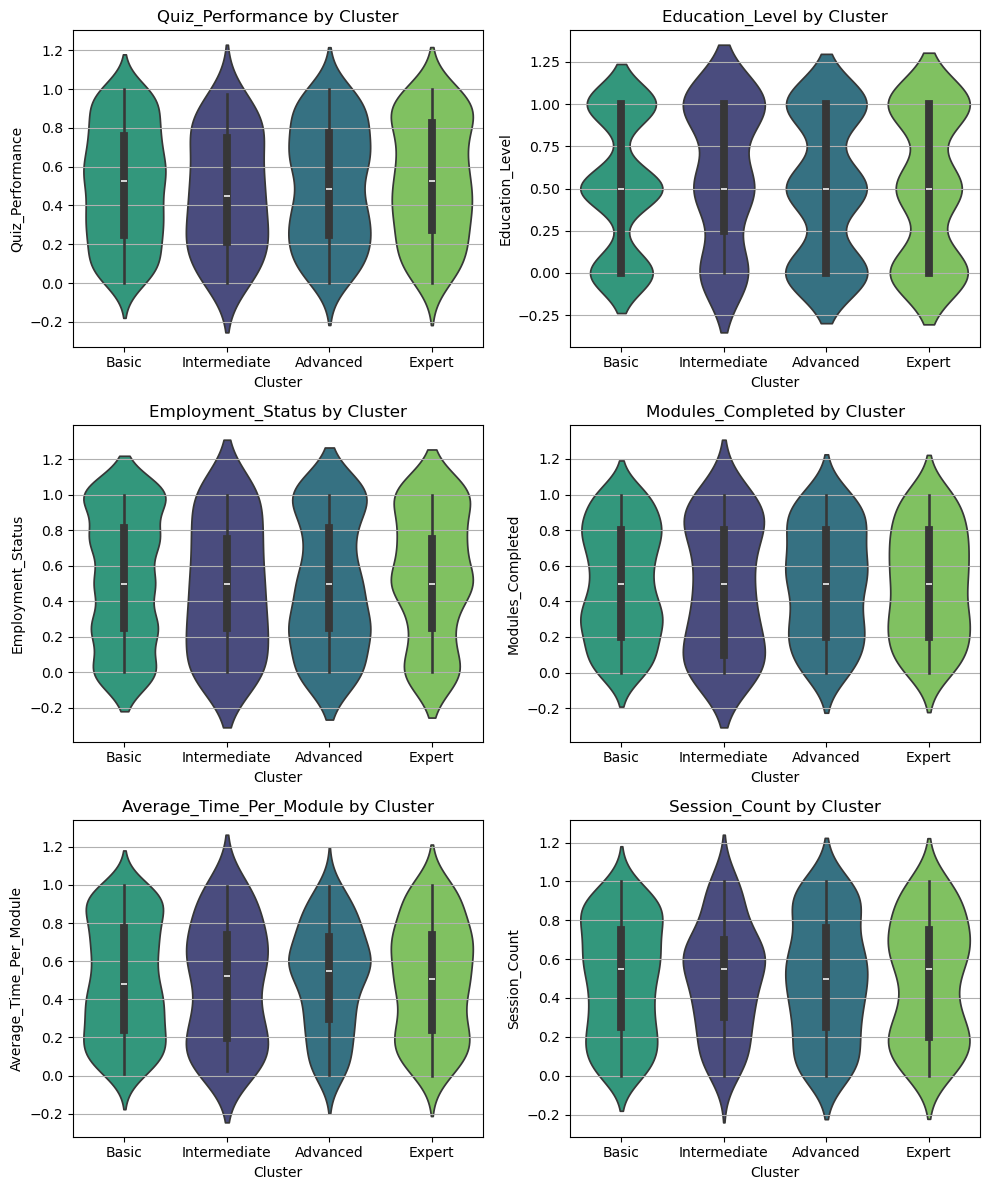

In [29]:
features = [
    'Quiz_Performance',
    'Education_Level',
    'Employment_Status',
    'Modules_Completed',
    'Average_Time_Per_Module',
    'Session_Count'
]

#order = ["Low Literacy", "Medium Literacy", "High Literacy"]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(10, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df_scaled,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

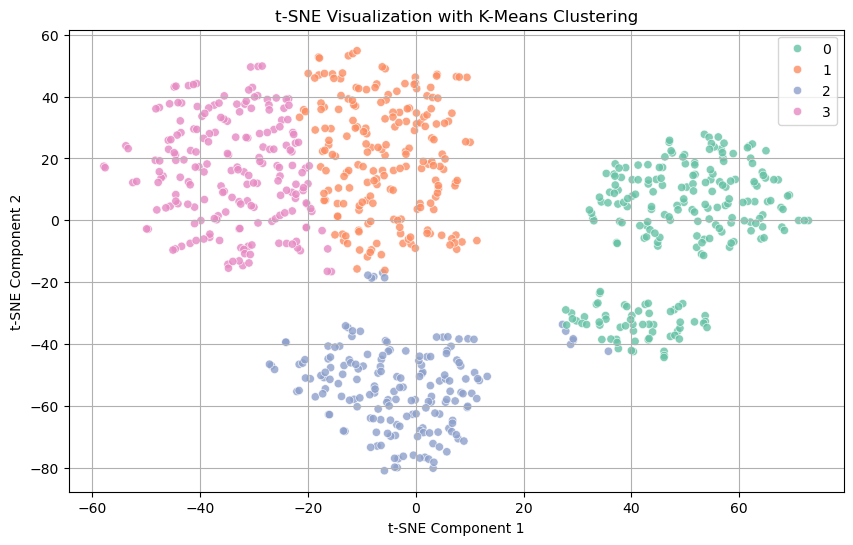

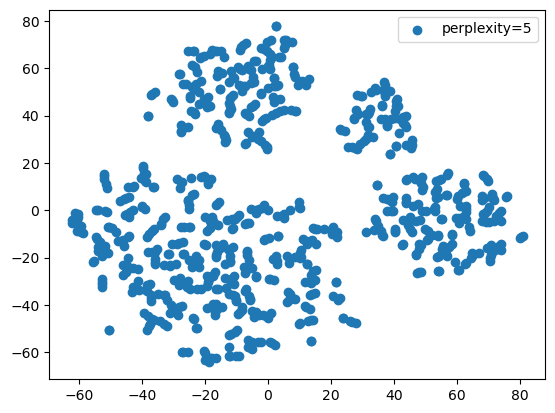

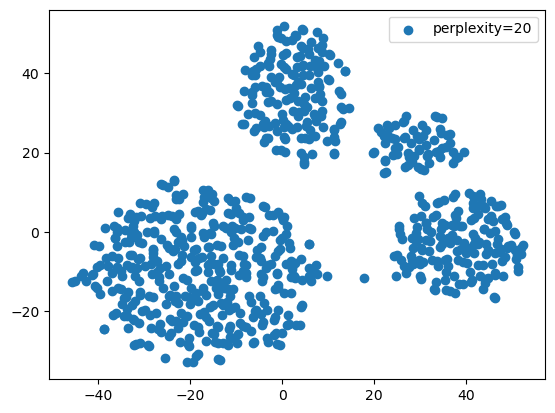

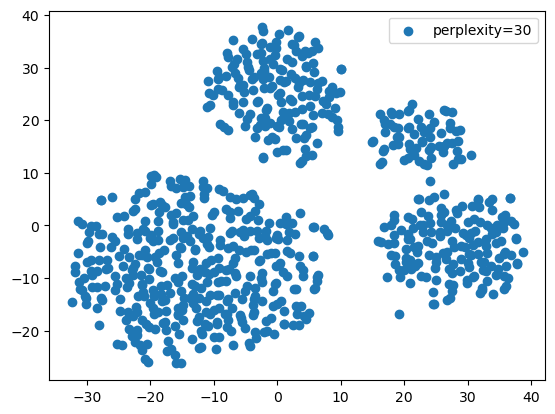

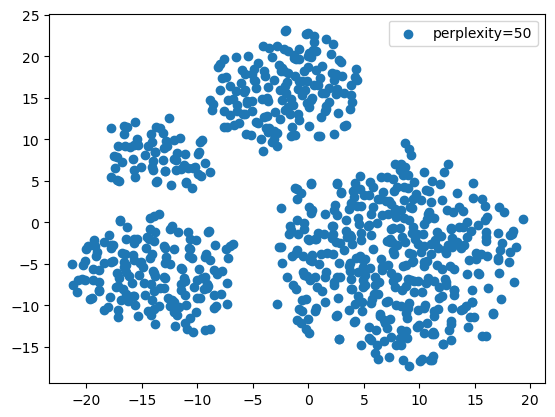

In [30]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Prepare your data
data = df_scaled.drop(['Cluster','Cluster_Name','Digitac_Score'], axis=1, errors='ignore')
#scaled_data = MinMaxScaler().fit_transform(data)

for perp in [5, 20, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=0)
    X_embedded = tsne.fit_transform(data)
    plt.scatter(X_embedded[:,0], X_embedded[:,1], label=f"perplexity={perp}")
    plt.legend()
    plt.show()

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=9, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(data)

# Step 3: Cluster (optional)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(tsne_result)

# Step 4: Plot
plt.figure(figsize=(10, 6))
palette = seaborn.color_palette("Set2", n_colors=len(set(labels)))
seaborn.scatterplot(
    x=tsne_result[:, 0], y=tsne_result[:, 1],
    hue=labels,
    palette=palette,
    legend='full',
    alpha=0.8
)
plt.title("t-SNE Visualization with K-Means Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()



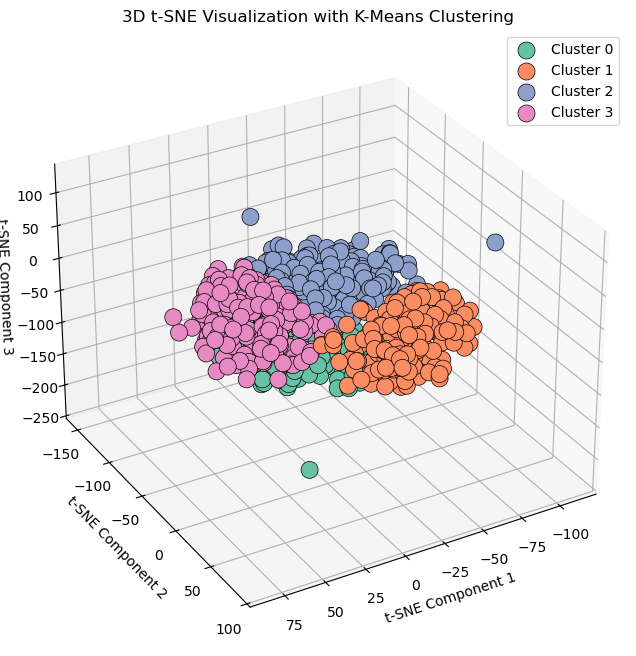

In [31]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


data = df_scaled.drop(['Cluster', 'Cluster_Name','Digital_Score'], axis=1, errors='ignore')
#scaled_data = MinMaxScaler().fit_transform(data)


tsne = TSNE(n_components=3, perplexity=20, learning_rate=200, random_state=42)
tsne_result_3d = tsne.fit_transform(data)


kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(tsne_result_3d)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')



palette = sns.color_palette("Set2", n_colors=len(set(labels)))

for i, color in enumerate(palette):
    idx = labels == i
    ax.scatter(
        tsne_result_3d[idx, 0], tsne_result_3d[idx, 1], tsne_result_3d[idx, 2],
        c=[color], label=f'Cluster {i}', s=150, alpha=1.0, edgecolor='k',
        linewidth=0.5
    )

ax.set_title("3D t-SNE Visualization with K-Means Clustering")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.view_init(elev=30, azim=60)  
ax.legend()
plt.show()


## DBSCAN


StandardScaler DBSCAN cluster counts:
-1     176
 0     511
 1       9
 2       5
 3      26
 4       7
 5      10
 6      11
 7       8
 8       9
 9       9
 10      7
Name: count, dtype: int64

MinMaxScaler DBSCAN cluster counts:
0     67
1    160
2    396
3    165
Name: count, dtype: int64


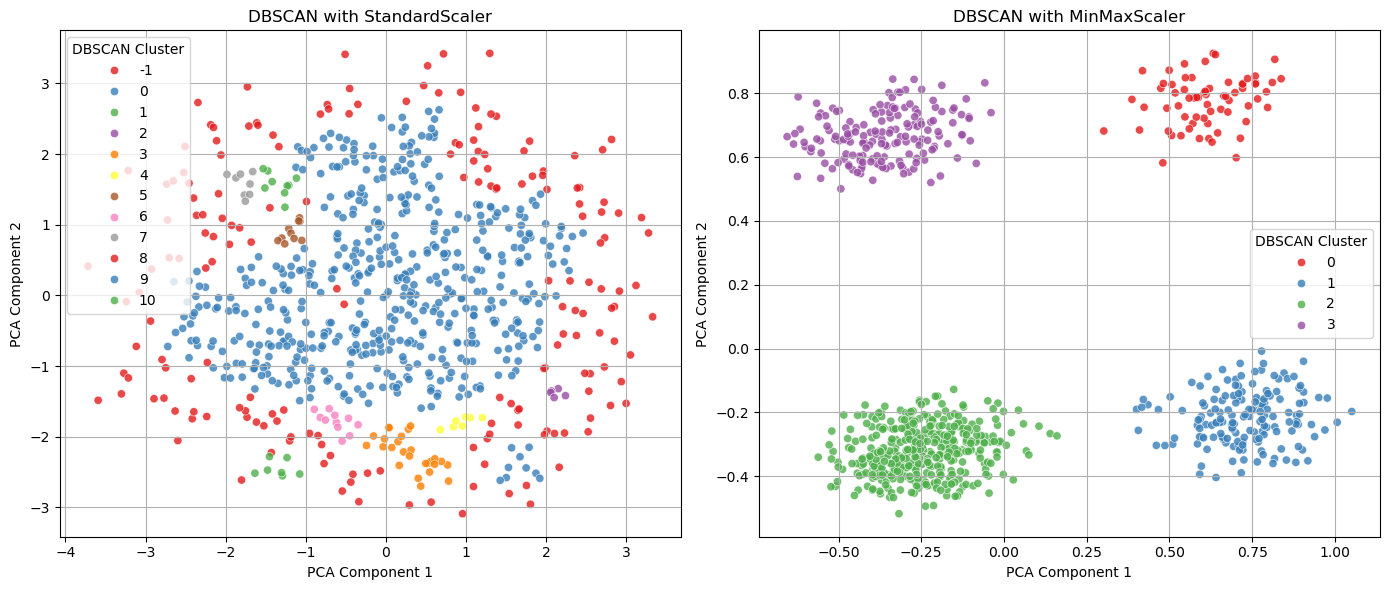

In [32]:
# Comparison between StandardScaler and MinMaxScaler for DBSCAN clustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    dbscan = DBSCAN(eps=0.23, min_samples=5)
    dbscan_labels = dbscan.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": dbscan_labels,
        "pca_result": pca_result
    }
    print(f"\n{scaler_name} DBSCAN cluster counts:")
    print(pd.Series(dbscan_labels).value_counts().sort_index())

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = sns.color_palette("Set1", n_colors=len(set(res["labels"])))
    sns.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"DBSCAN with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="DBSCAN Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [33]:
dbscan = DBSCAN(eps=0.23, min_samples=5)
df_scaled['Cluster'] = dbscan.fit_predict(pca_result)

In [34]:
cluster_profile = df.groupby('Cluster')[
    [
        "Cluster",
        'Basic_Computer_Knowledge_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
    ]
].mean().round(2)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"]
)

Cluster Profile 
 
 
 Cluster 
 Basic_Computer_Knowledge_Score 
 Internet_Usage_Score 
 Mobile_Literacy_Score 
 
 
 
 
 0.0 
 22.82 
 25.12 
 22.52 
 
 
 1.0 
 23.25 
 25.49 
 24.53 
 
 
 2.0 
 25.46 
 25.25 
 26.72 
 
 
 3.0 
 26.56 
 23.86 
 25.08

In [35]:
cluster_names = {
    0: "Low Literacy",
    1: "Medium Literacy",
    3: "High Literacy",
    2: "Very High Literacy"
}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

### Features with high correlation levels

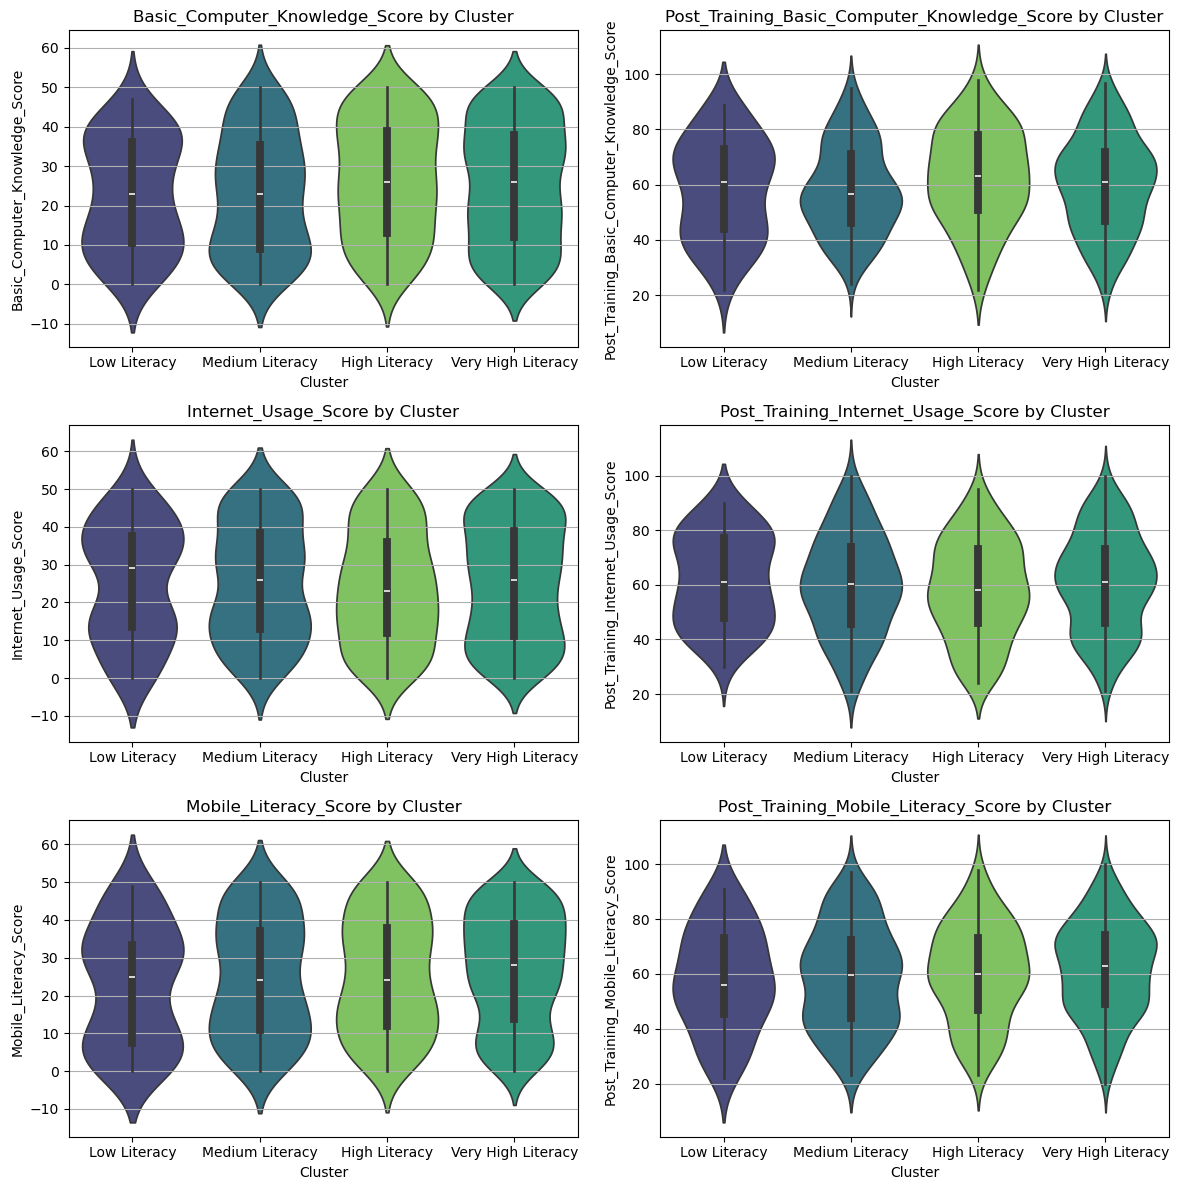

In [36]:

features = [
    'Basic_Computer_Knowledge_Score',
    'Post_Training_Basic_Computer_Knowledge_Score',
    'Internet_Usage_Score',
    'Post_Training_Internet_Usage_Score',
    'Mobile_Literacy_Score',
    'Post_Training_Mobile_Literacy_Score'
]

order = ["Low Literacy", "Medium Literacy", "High Literacy","Very High Literacy"]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Features with low correlation levels

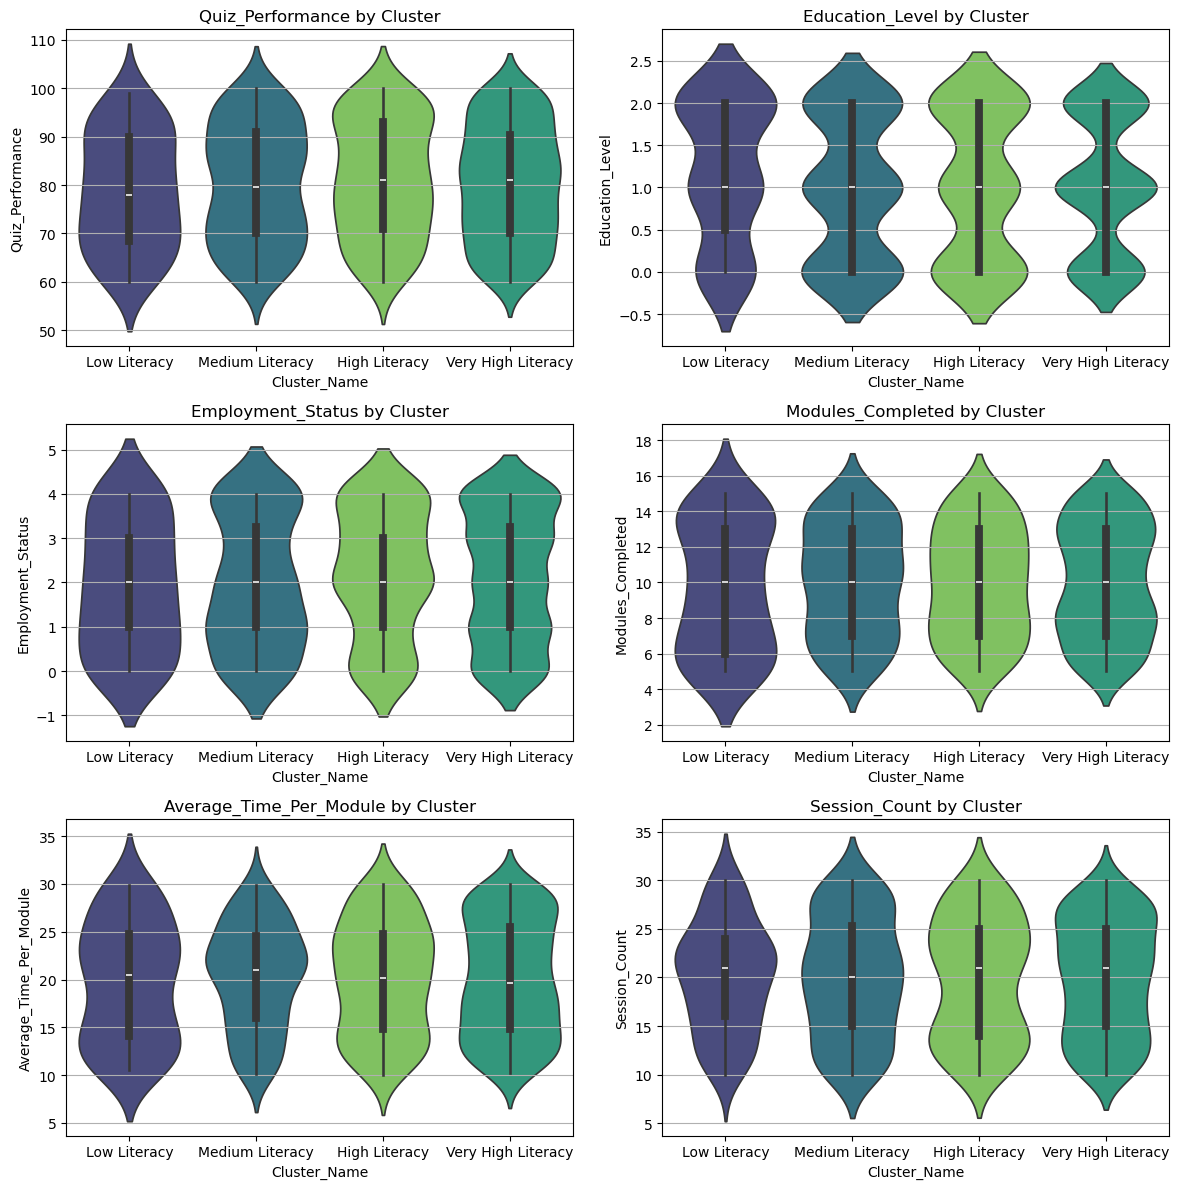

In [37]:

features = [
    'Quiz_Performance',
    'Education_Level',
    'Employment_Status',
    'Modules_Completed',
    'Average_Time_Per_Module',
    'Session_Count'
]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

## Hierarchical Agglomerative clustering

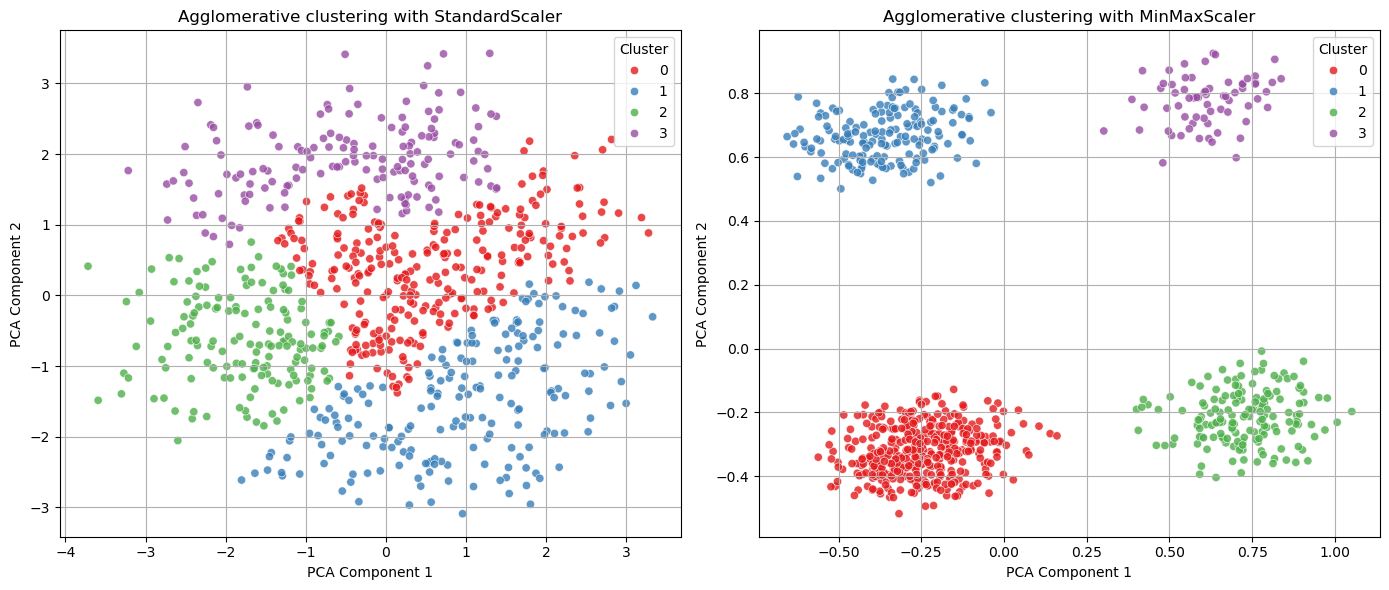

In [38]:
from sklearn.cluster import AgglomerativeClustering

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    aggclust = AgglomerativeClustering(n_clusters=4)
    aggclust_labels = aggclust.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": aggclust_labels,
        "pca_result": pca_result,
        "scaled_data":scaled_data
    }

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = sns.color_palette("Set1", n_colors=len(set(res["labels"])))
    sns.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"Agglomerative clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()


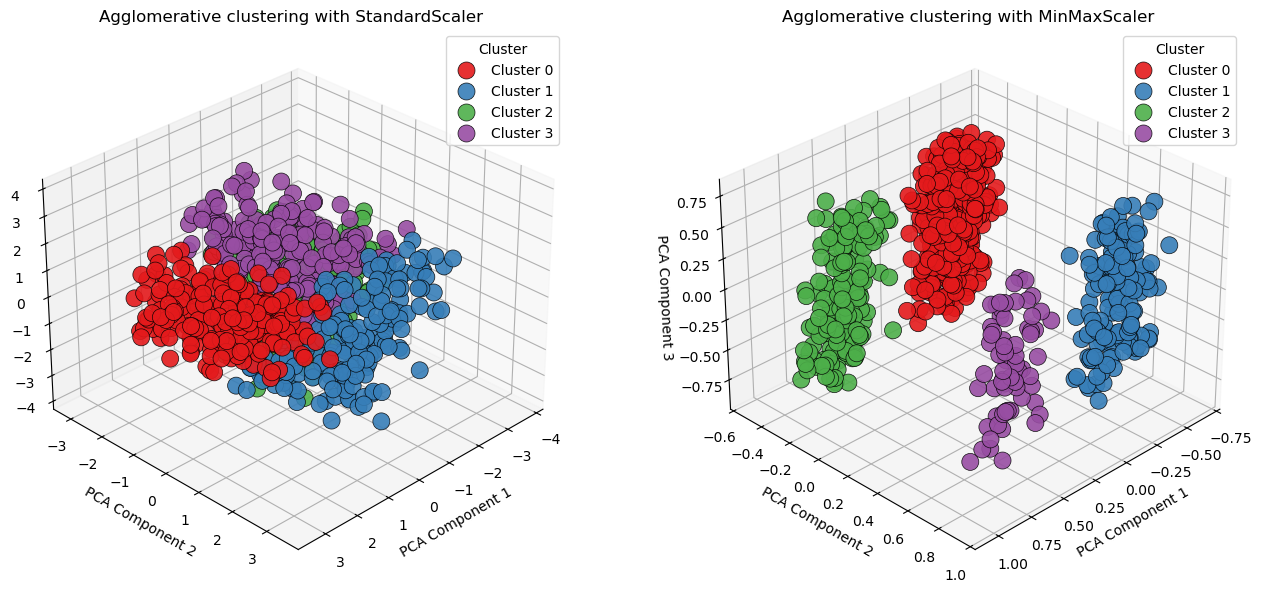

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}


for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result_3d = pca.fit_transform(scaled_data)
    
    aggclust = AgglomerativeClustering(n_clusters=4)
    aggclust_labels = aggclust.fit_predict(pca_result_3d)
    
    results[scaler_name] = {
        "labels": aggclust_labels,
        "pca_result": pca_result_3d,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            res["pca_result"][idx, 2],
            c=[color],
            label=f'Cluster {lbl}',
            s=150,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Agglomerative clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    ax.view_init(elev=30, azim=45)
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()


Threshold for 4 clusters: 8.188648576170745


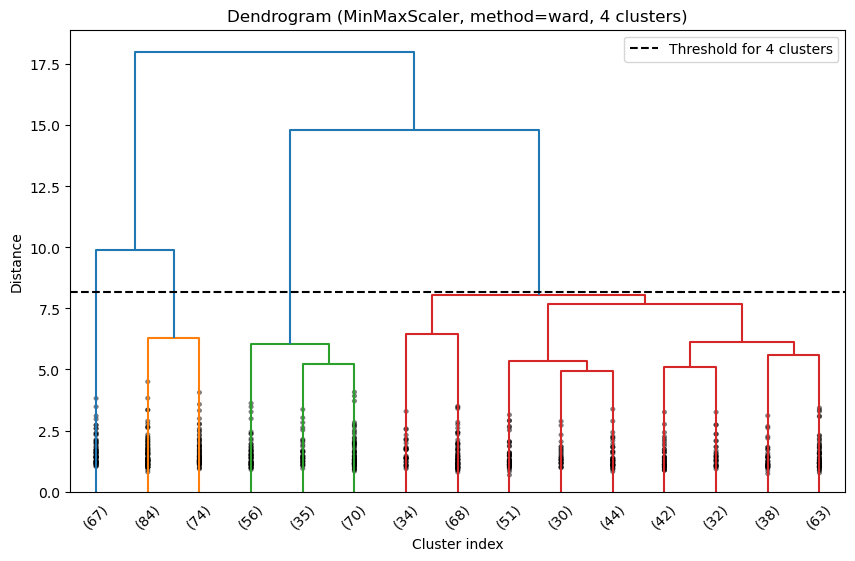

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(results[scaler_name]["scaled_data"], method="ward")

# Determine the threshold that gives 4 clusters
max_d = 0.0
for t in np.linspace(0, np.max(Z[:, 2]), 100):
    if len(np.unique(fcluster(Z, t, criterion='distance'))) == 4:
        max_d = t
        break

print(f"Threshold for 4 clusters: {max_d}")

# Plot dendrogram with color threshold
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=15,
    leaf_rotation=45.,
    leaf_font_size=10.,
    show_contracted=True,
    color_threshold=max_d
)
plt.title(f"Dendrogram ({scaler_name}, method=ward, 4 clusters)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.axhline(y=max_d, c='k', ls='--', label=f'Threshold for 4 clusters')
plt.legend()
plt.show()

In [41]:
aggclust = AgglomerativeClustering(n_clusters=4)
df['Cluster'] = aggclust.fit_predict(pca_result)

In [42]:
cluster_profile = df_scaled.groupby('Cluster')[
    [
        "Cluster",
        'Internet_Usage_Score'
    ]
].mean().round(2)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"]
)

Cluster Profile 
 
 
 Cluster 
 Internet_Usage_Score 
 
 
 
 
 0.0 
 0.51 
 
 
 1.0 
 0.50 
 
 
 2.0 
 0.48 
 
 
 3.0 
 0.50

In [43]:
cluster_names = {
    3: "Low Literacy",
    1: "Medium Literacy",
    2: "High Literacy",
    0: "Very High Literacy"
}
df_scaled['Cluster_Name'] = df_scaled['Cluster'].map(cluster_names)

#### Features with high correlation levels

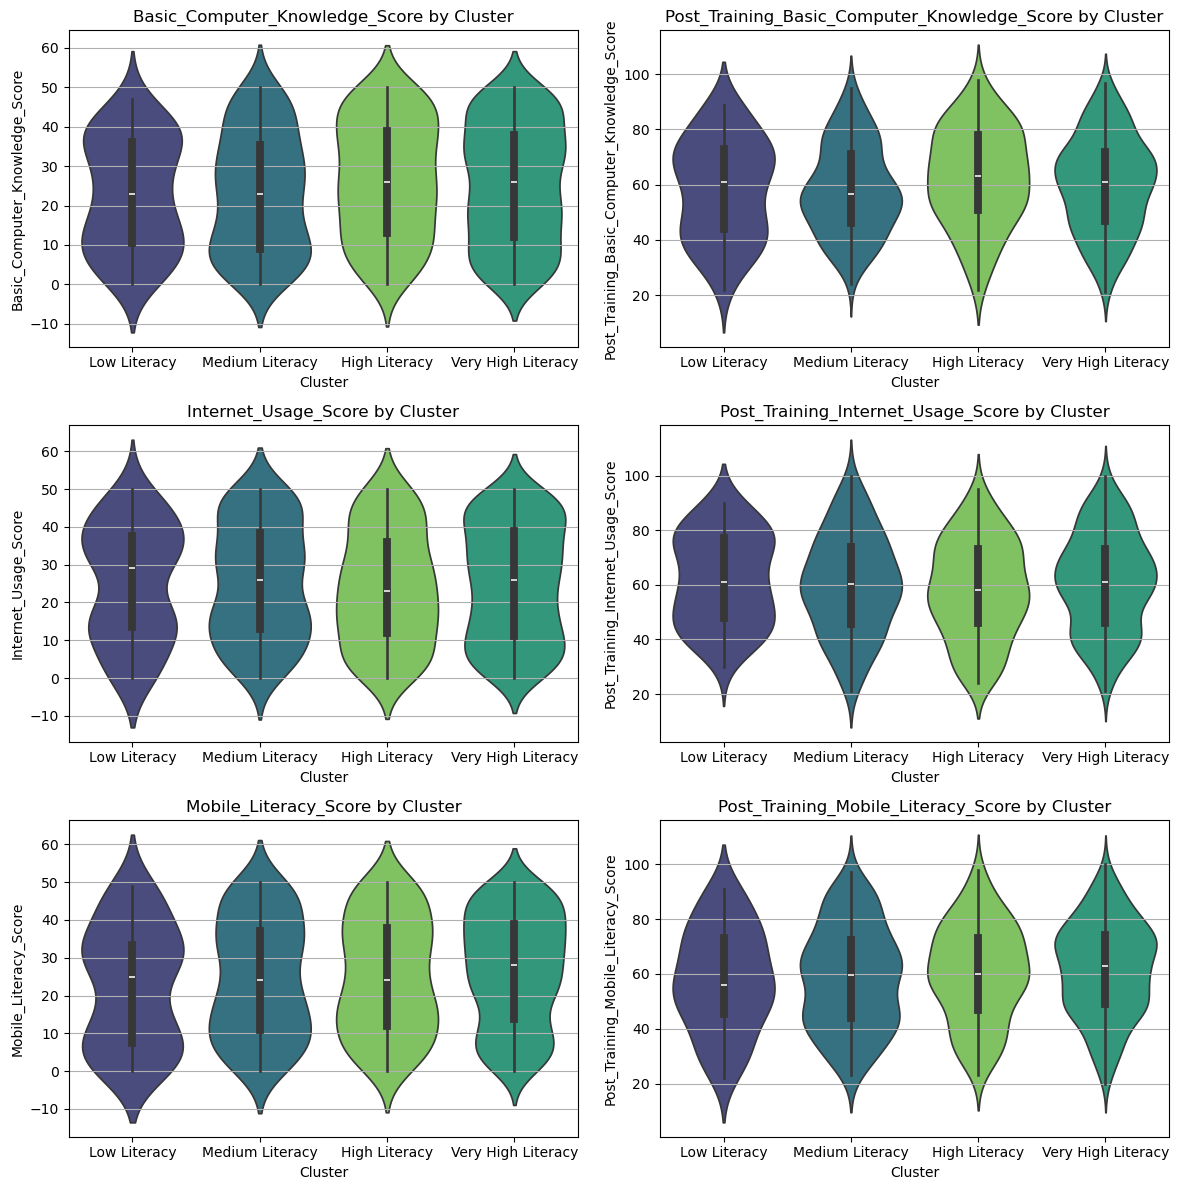

In [44]:
features = [
    'Basic_Computer_Knowledge_Score',
    'Post_Training_Basic_Computer_Knowledge_Score',
    'Internet_Usage_Score',
    'Post_Training_Internet_Usage_Score',
    'Mobile_Literacy_Score',
    'Post_Training_Mobile_Literacy_Score'
]

order = ["Low Literacy", "Medium Literacy", "High Literacy","Very High Literacy"]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Features with low correlation levels

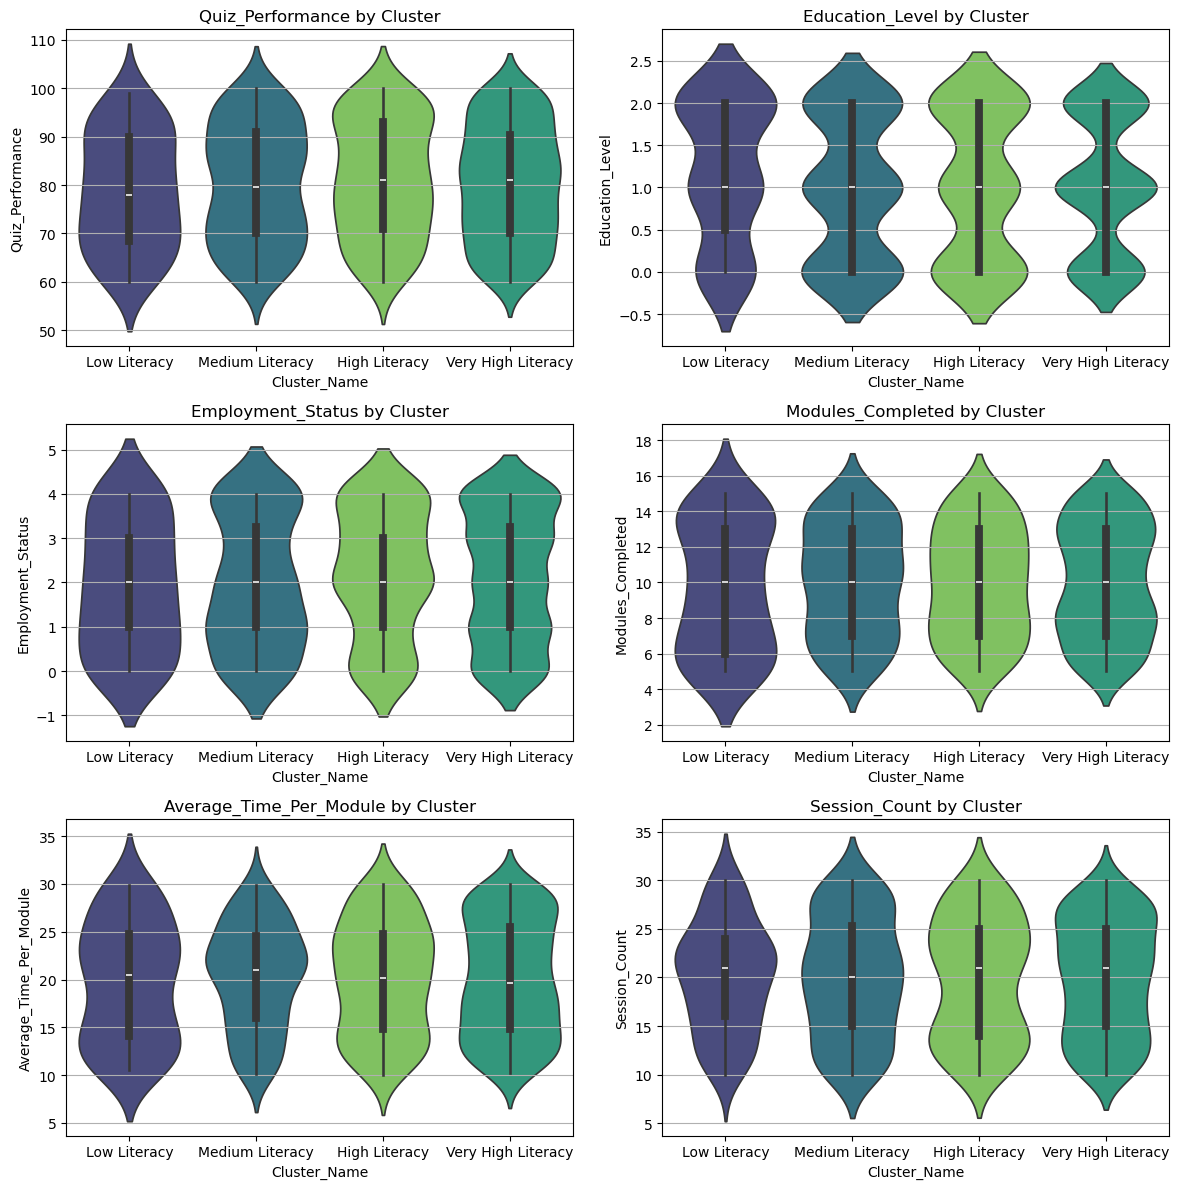

In [45]:
features = [
    'Quiz_Performance',
    'Education_Level',
    'Employment_Status',
    'Modules_Completed',
    'Average_Time_Per_Module',
    'Session_Count'
]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

## Mean Shift Clustering

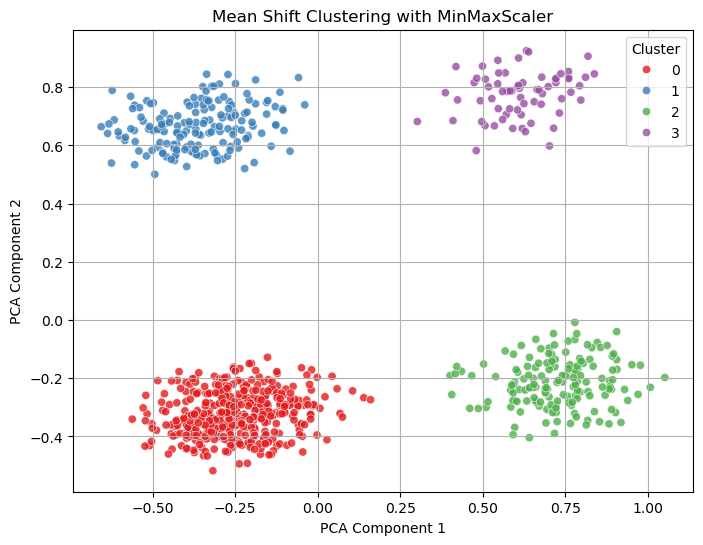

In [46]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

mean_shift = MeanShift()
labels = mean_shift.fit_predict(pca_result)


palette = sns.color_palette("Set1", n_colors=len(set(labels)))
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=labels,
    palette=palette,
    legend='full',
    alpha=0.8
)
plt.title("Mean Shift Clustering with MinMaxScaler")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Broj klastera: 4


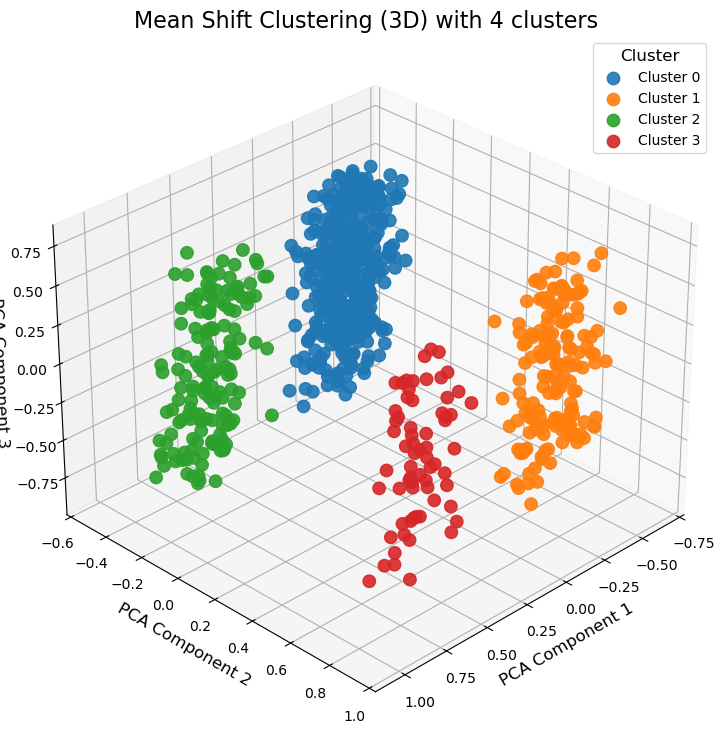

In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)


bandwidth = estimate_bandwidth(pca_result, quantile=0.2) 
mean_shift = MeanShift(bandwidth=bandwidth)
labels = mean_shift.fit_predict(pca_result)

n_clusters = len(np.unique(labels))
print(f"Broj klastera: {n_clusters}")


palette = sns.color_palette("tab10", n_colors=n_clusters)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(np.unique(labels), palette):
    cluster_points = pca_result[labels == label]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        label=f'Cluster {label}',
        s=80,
        alpha=0.9,
        c=[color]
    )

ax.set_title(f"Mean Shift Clustering (3D) with {n_clusters} clusters", fontsize=16)
ax.set_xlabel("PCA Component 1", fontsize=12)
ax.set_ylabel("PCA Component 2", fontsize=12)
ax.set_zlabel("PCA Component 3", fontsize=12)
ax.grid(True)
ax.legend(title="Cluster", fontsize=10, title_fontsize=12)
ax.view_init(elev=30, azim=45) 

plt.show()


## BIRCH

Broj klastera: 4


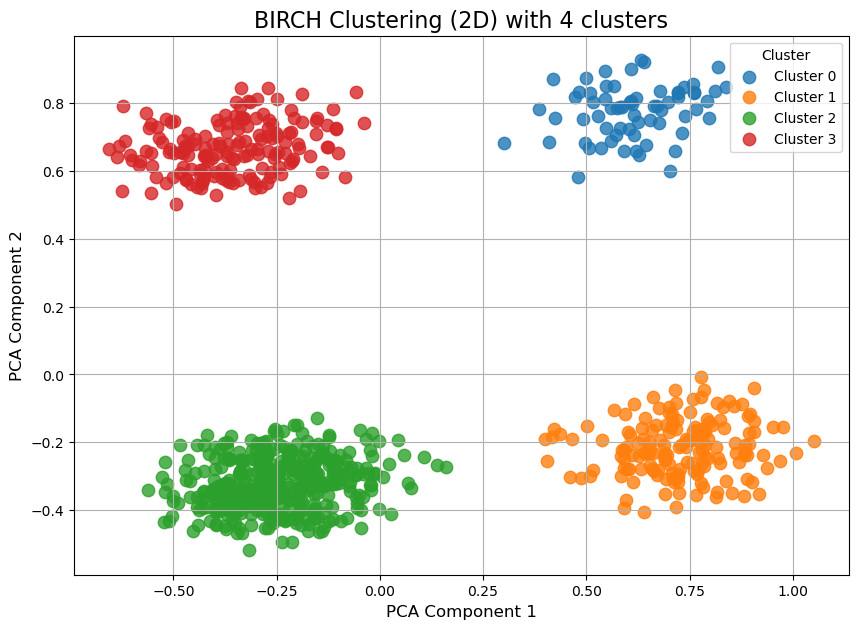

In [50]:
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Priprema podataka
cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

# Skaliranje podataka
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# PCA na 2 komponente radi vizualizacije
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Birch klasterovanje
birch_model = Birch(threshold=0.3, n_clusters=None)  
labels = birch_model.fit_predict(pca_result)

# Broj klastera
n_clusters = len(np.unique(labels))
print(f"Broj klastera: {n_clusters}")

# Paleta boja
palette = sns.color_palette("tab10", n_colors=n_clusters)

# Vizualizacija
plt.figure(figsize=(10, 7))
for label, color in zip(np.unique(labels), palette):
    cluster_points = pca_result[labels == label]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f'Cluster {label}',
        s=80,
        alpha=0.8,
        color=color
    )

plt.title(f"BIRCH Clustering (2D) with {n_clusters} clusters", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


C:\Users\usics\AppData\Local\Temp\ipykernel_19608\3543253292.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\usics\AppData\Local\Temp\ipykernel_19608\3543253292.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\usics\AppData\Local\Temp\ipykernel_19608\3543253292.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\usics\AppData\Local\Temp\ipykernel_19608\3543253292.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\usics\AppData\Local\Temp\ipykernel_19608\3543253292.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\usics\AppData\Local\Temp\ipykernel_19608\3543253292.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use 

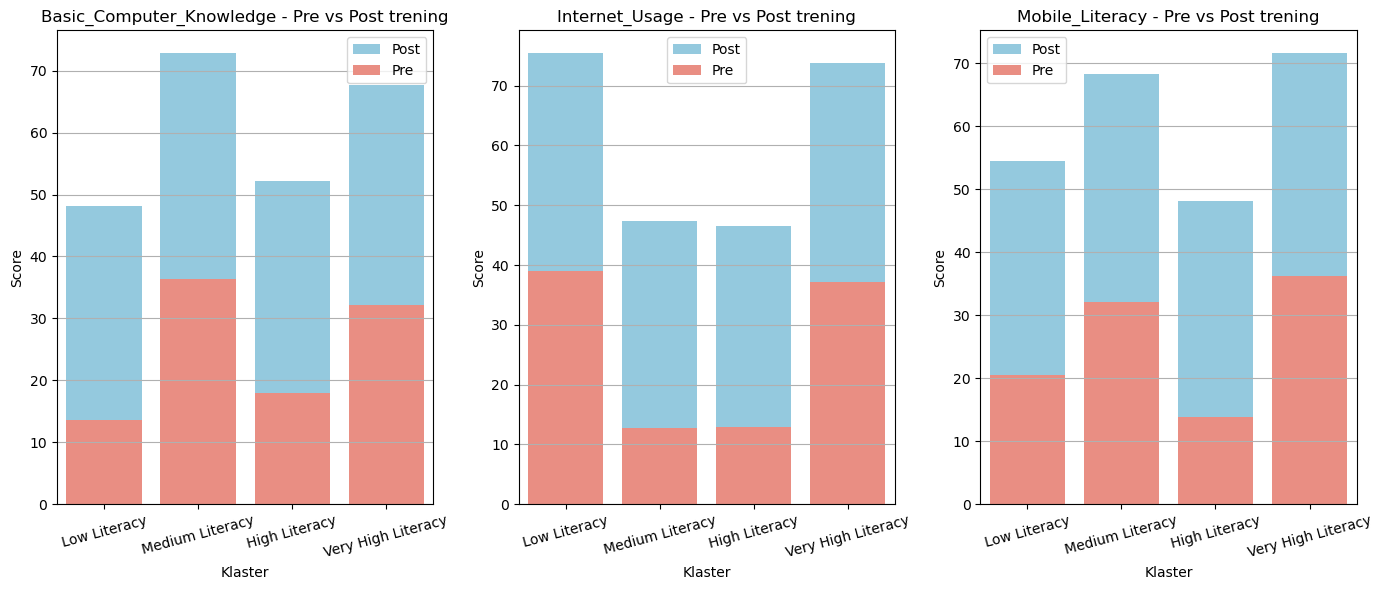

<Figure size 1000x600 with 0 Axes>

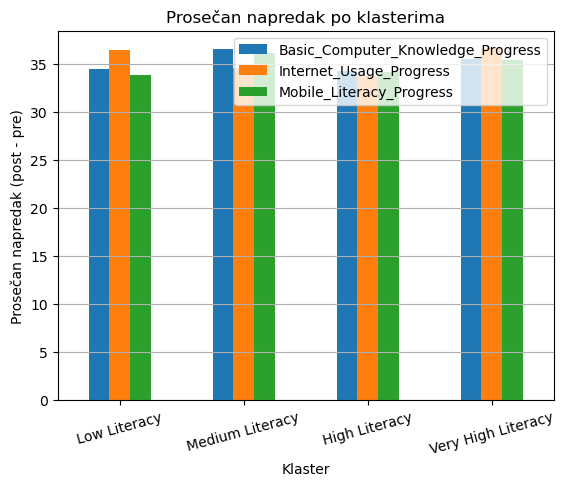

In [80]:
# Definisanje željenog redosleda
order = ["Low Literacy", "Medium Literacy", "High Literacy", "Very High Literacy"]

# Vizualizacija Pre vs Post trening po imenima klastera
plt.figure(figsize=(14, 6))
for i, attr in enumerate(attributes):
    plt.subplot(1, 3, i+1)
    sns.barplot(
        x='Cluster_Name', 
        y=f'Post_Training_{attr}_Score', 
        data=df, 
        color='skyblue', 
        ci=None, 
        label='Post',
        order=order
    )
    sns.barplot(
        x='Cluster_Name', 
        y=f'{attr}_Score', 
        data=df, 
        color='salmon', 
        ci=None, 
        label='Pre',
        order=order
    )
    plt.title(f'{attr} - Pre vs Post trening')
    plt.ylabel('Score')
    plt.xlabel('Klaster')
    plt.xticks(rotation=15)  
    plt.legend()
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Vizualizacija napretka po imenima klastera 
plt.figure(figsize=(10,6))
cluster_summary = cluster_summary.reindex(order)  
cluster_summary[[f'{attr}_Progress' for attr in attributes]].plot(kind='bar')
plt.title("Prosečan napredak po klasterima")
plt.xlabel("Klaster")
plt.ylabel("Prosečan napredak (post - pre)")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


